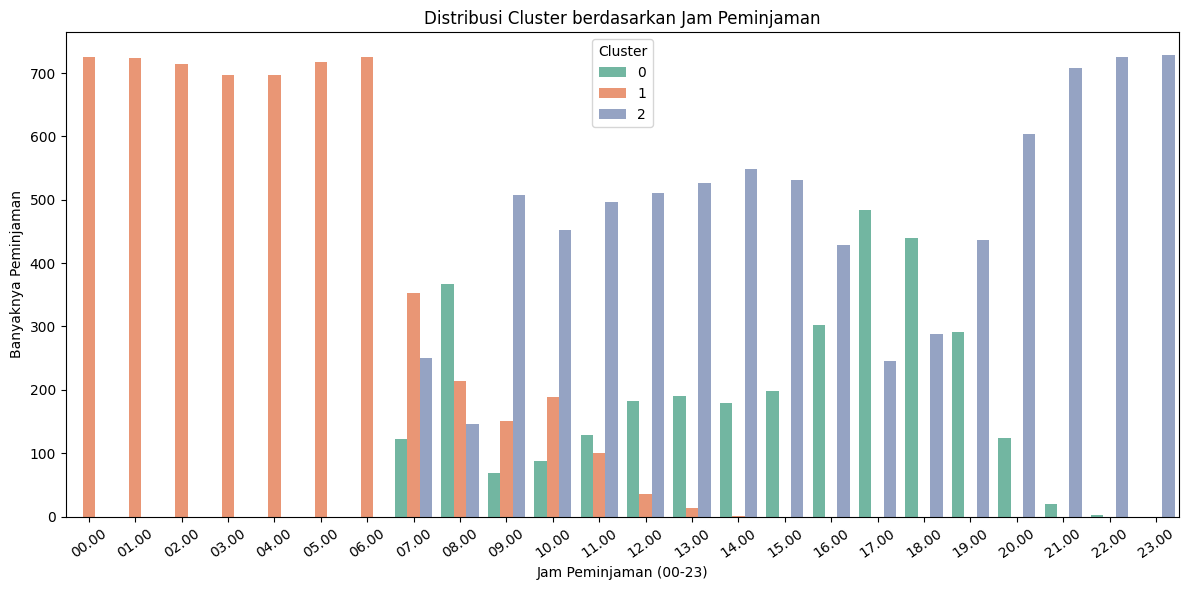

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('hour.csv')

data = df[['cnt', 'casual', 'registered', 'hr', 'weekday']]

hour_labels = ['00.00', '01.00', '02.00', '03.00', '04.00', '05.00', '06.00', 
               '07.00', '08.00', '09.00', '10.00', '11.00', '12.00', 
               '13.00', '14.00', '15.00', '16.00', '17.00', '18.00', 
               '19.00', '20.00', '21.00', '22.00', '23.00']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

cluster_by_hour = df[['hr', 'Cluster']]

plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_by_hour, x='hr', hue='Cluster', palette='Set2')
plt.title("Distribusi Cluster berdasarkan Jam Peminjaman")
plt.xlabel("Jam Peminjaman")
plt.ylabel("Banyaknya Peminjaman")
plt.legend(title="Cluster", labels=['Pagi (Cluster 0)', 'Siang (Cluster 1)', 'Malam (Cluster 2)'])
plt.xticks(ticks=range(len(hour_labels)), labels=hour_labels, rotation = 35)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()